# Input a 2D pollutied data set within normal distributed noise.

## Noise involed three  parts: background, position and value noise(the dependent number)

<IPython.core.display.Javascript object>


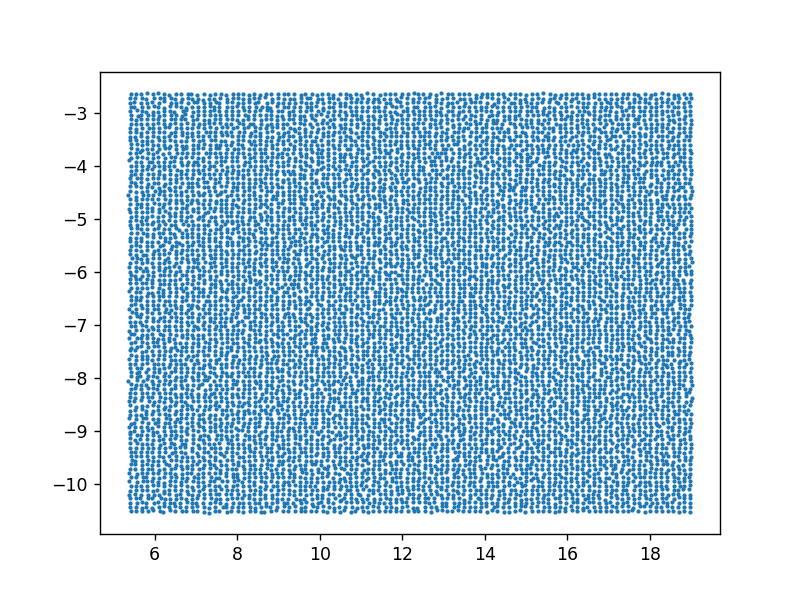

<IPython.core.display.Javascript object>


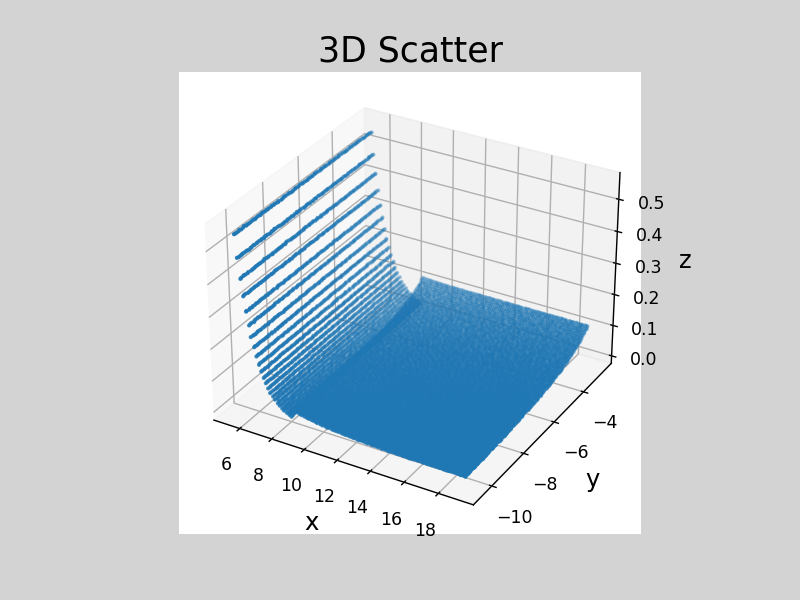

In [1]:
%reset -f
%clear
import numpy as np
import copy
import matplotlib.pyplot as plt 
plt.close('all')
import scipy.io as scio
from mpl_toolkits.mplot3d import axes3d
import pandas as pd

DataF = scio.loadmat('PollutedData.mat')
DataF = DataF['DataP']
DataX = scio.loadmat('PollutedPositionX.mat')
DataX = DataX['PositionXP']
DataY = scio.loadmat('PollutedPositionY.mat')
DataY = DataY['PositionYP']

%matplotlib notebook
plt.scatter(DataX, DataY, s = 2)
plt.show()

plt.figure("3D Scatter", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)

ax3d.scatter(DataX, DataY, DataF, s = 2)
plt.show()

## Pre_treatment
<img src="Pt1.png" width="100"/>

<IPython.core.display.Javascript object>


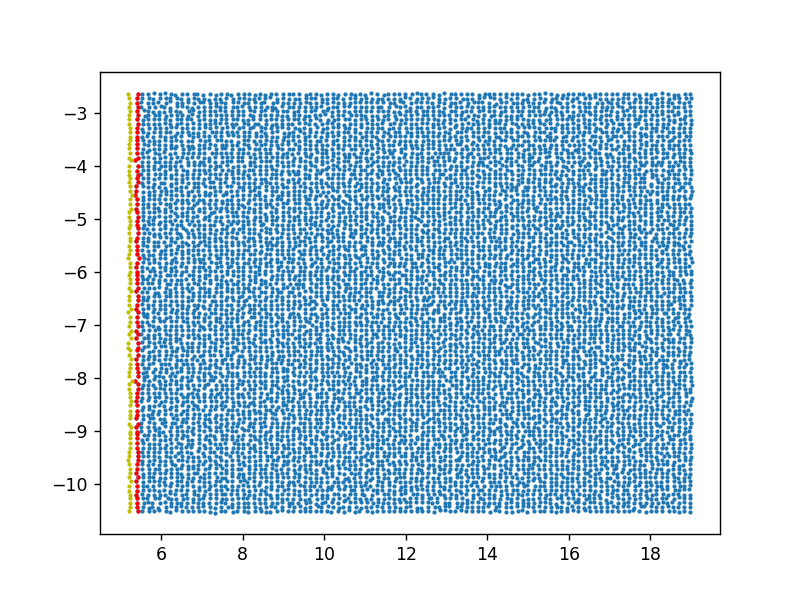

10100


In [2]:
def indexofMin(arr):
    minindex = 0
    currentindex = 1
    while currentindex < len(arr):
        if arr[currentindex] < arr[minindex]:
            minindex = currentindex
        currentindex += 1
    return minindex

def indexofMax(arr):
    maxindex = 0
    currentindex = 1
    while currentindex < len(arr):
        if arr[currentindex] > arr[maxindex]:
            maxindex = currentindex
        currentindex += 1
    return maxindex

X_mid = (max(DataX) - min(DataX))/2 + min(DataX)
Y_mid = (max(DataY) - min(DataY))/2 + min(DataY)

#X Minimum
Pt_loop_Xmin = np.linspace(0, 99, num = 100, dtype = int)
DataX_Xmin_PrT = copy.deepcopy(DataX)
DataY_Xmin_PrT = copy.deepcopy(DataY)
Pt_XMinx_Frame = np.zeros((100,1))
Pt_XMiny_Frame = np.zeros((100,1))
Pt_XMinx_M1 = np.zeros((100,1))
Pt_XMiny_M1 = np.zeros((100,1))

#Frame - The reference line
for PtN in Pt_loop_Xmin:
    PT_temp = indexofMin(DataX_Xmin_PrT)
    Pt_XMinx_Frame[PtN] = DataX_Xmin_PrT[PT_temp]
    Pt_XMiny_Frame[PtN] = DataY_Xmin_PrT[PT_temp]
    DataX_Xmin_PrT[PT_temp] = X_mid
    DataY_Xmin_PrT[PT_temp] = Y_mid

# M1 & M1m Line 
for PtN in Pt_loop_Xmin:
    PT_temp = indexofMin(DataX_Xmin_PrT)
    Pt_XMinx_M1[PtN] = DataX_Xmin_PrT[PT_temp]
    Pt_XMiny_M1[PtN] = DataY_Xmin_PrT[PT_temp]

# Cutting Reflection
Pt_XMinx_FrameR = -1 * Pt_XMinx_Frame
Xmin_Offset = np.abs(np.mean(Pt_XMinx_Frame - Pt_XMinx_M1))
Xmin_GAP = np.abs(np.mean(Pt_XMinx_Frame - Pt_XMinx_FrameR))
Pt_XMinx_CR = Pt_XMinx_FrameR + Xmin_GAP - Xmin_Offset * 2

DataX_xmin_Pt = np.vstack((DataX, Pt_XMinx_CR))
DataY_xmin_Pt = np.vstack((DataY, Pt_XMiny_Frame))

plt.figure()
plt.scatter(DataX, DataY, s = 2)
plt.scatter(Pt_XMinx_Frame, Pt_XMiny_Frame, s = 2, c = 'r')
plt.scatter(Pt_XMinx_CR, Pt_XMiny_Frame, s = 2, c = 'y')
plt.show()

print(len(DataX_xmin_Pt))

101
101


<IPython.core.display.Javascript object>


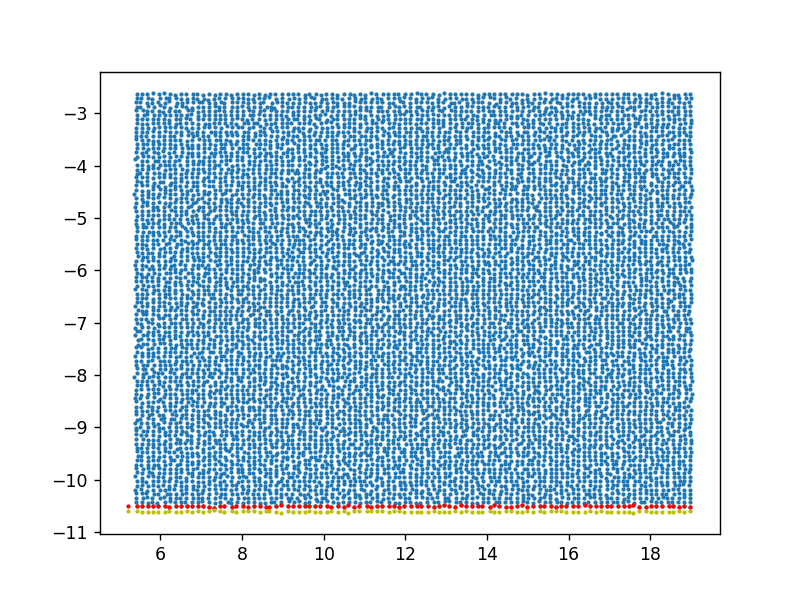

In [3]:
#Y Minimum
Pt_loop_Ymin = np.linspace(0, 100, num = 101, dtype = int)
DataX_Ymin_PrT = copy.deepcopy(DataX_xmin_Pt)
DataY_Ymin_PrT = copy.deepcopy(DataY_xmin_Pt)
Pt_YMinx_Frame = np.zeros((101, 1))
Pt_YMiny_Frame = np.zeros((101, 1))
Pt_YMinx_M1 = np.zeros((101, 1))
Pt_YMiny_M1 = np.zeros((101, 1)) 

#Frame - The reference line
for PtN in Pt_loop_Ymin:
    PT_temp = indexofMin(DataY_Ymin_PrT)
    Pt_YMinx_Frame[PtN] = DataX_Ymin_PrT[PT_temp]
    Pt_YMiny_Frame[PtN] = DataY_Ymin_PrT[PT_temp]
    DataX_Ymin_PrT[PT_temp] = X_mid
    DataY_Ymin_PrT[PT_temp] = Y_mid

# M1 & M1m Line 
for PtN in Pt_loop_Ymin:
    PT_temp = indexofMin(DataY_Ymin_PrT)
    Pt_YMinx_M1[PtN] = DataX_Ymin_PrT[PT_temp]
    Pt_YMiny_M1[PtN] = DataY_Ymin_PrT[PT_temp]

# M2m offset
Pt_YMiny_FrameR = -1 * Pt_YMiny_Frame
Ymin_Offset = np.abs(np.mean(Pt_YMiny_Frame - Pt_YMiny_M1))
Ymin_GAP = np.abs(np.mean(Pt_YMiny_Frame - Pt_YMiny_FrameR))
Pt_YMiny_CR = Pt_YMiny_FrameR - Ymin_GAP - Ymin_Offset * 2

# DataLEGO
DataX_ymin_Pt = np.vstack((DataX_xmin_Pt, Pt_YMinx_Frame))
DataY_ymin_Pt = np.vstack((DataY_xmin_Pt, Pt_YMiny_CR))

print(len(Pt_YMinx_Frame))
print(len(Pt_YMiny_CR))
plt.figure()
plt.scatter(DataX, DataY, s = 2)
plt.scatter(Pt_YMinx_Frame, Pt_YMiny_Frame, s = 2, c = 'r')
plt.scatter(Pt_YMinx_Frame, Pt_YMiny_CR, s = 2, c = 'y')
plt.show()

<IPython.core.display.Javascript object>


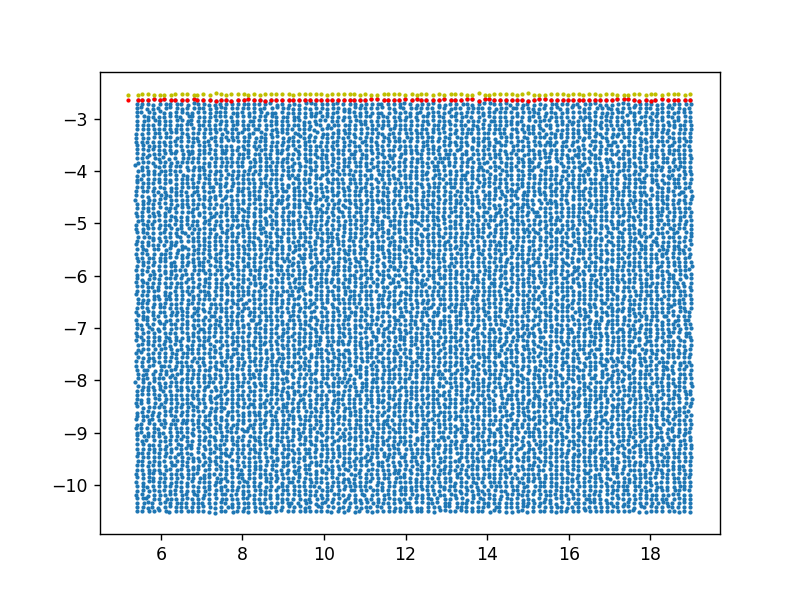

In [4]:
#Y Maximum
Pt_loop_Ymax = np.linspace(0, 100, num = 101, dtype = int)
DataX_Ymax_PrT = copy.deepcopy(DataX_ymin_Pt)
DataY_Ymax_PrT = copy.deepcopy(DataY_ymin_Pt)
Pt_YMaxx_Frame = np.zeros((101, 1))
Pt_YMaxy_Frame = np.zeros((101, 1))
Pt_YMaxx_M1 = np.zeros((101, 1))
Pt_YMaxy_M1 = np.zeros((101, 1)) 

#Frame - The reference line
for PtN in Pt_loop_Ymax:
    PT_temp = indexofMax(DataY_Ymax_PrT)
    Pt_YMaxx_Frame[PtN] = DataX_Ymax_PrT[PT_temp]
    Pt_YMaxy_Frame[PtN] = DataY_Ymax_PrT[PT_temp]
    DataX_Ymax_PrT[PT_temp] = X_mid
    DataY_Ymax_PrT[PT_temp] = Y_mid

# M1 & M1m Line 
for PtN in Pt_loop_Ymax:
    PT_temp = indexofMax(DataY_Ymax_PrT)
    Pt_YMaxx_M1[PtN] = DataX_Ymax_PrT[PT_temp]
    Pt_YMaxy_M1[PtN] = DataY_Ymax_PrT[PT_temp]

# M2m offset
Pt_YMaxy_FrameR = -1 * Pt_YMaxy_Frame
Ymax_Offset = np.abs(np.mean(Pt_YMaxy_Frame - Pt_YMaxy_M1))
Ymax_GAP = np.abs(np.mean(Pt_YMaxy_Frame - Pt_YMaxy_FrameR))
Pt_YMaxy_CR = Pt_YMaxy_FrameR - Ymax_GAP + Ymax_Offset * 2

# DataLEGO
DataX_Ymax_Pt = np.vstack((DataX_ymin_Pt, Pt_YMaxx_Frame))
DataY_Ymax_Pt = np.vstack((DataY_ymin_Pt, Pt_YMaxy_CR))

plt.figure()
plt.scatter(DataX, DataY, s = 2)
plt.scatter(Pt_YMaxx_Frame, Pt_YMaxy_Frame, s = 2, c = 'r')
plt.scatter(Pt_YMaxx_Frame, Pt_YMaxy_CR, s = 2, c = 'y')
plt.show()

<IPython.core.display.Javascript object>


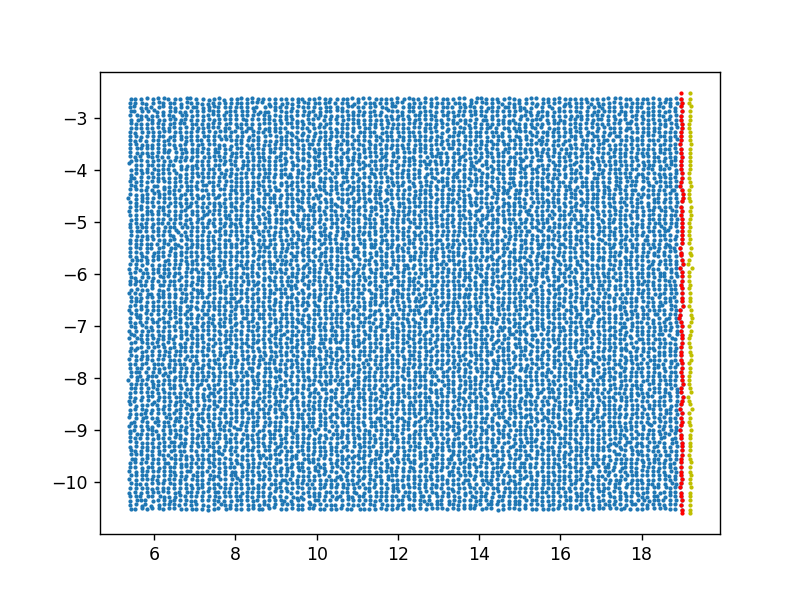

In [5]:
#X Maximum
Pt_loop_Xmax = np.linspace(0, 101, num = 102, dtype = int)
DataX_Xmax_PrT = copy.deepcopy(DataX_Ymax_Pt)
DataY_Xmax_PrT = copy.deepcopy(DataY_Ymax_Pt)
Pt_XMaxx_Frame = np.zeros((102, 1))
Pt_XMaxy_Frame = np.zeros((102, 1))
Pt_XMaxx_M1 = np.zeros((102, 1))
Pt_XMaxy_M1 = np.zeros((102, 1)) 

#Frame - The reference line
for PtN in Pt_loop_Xmax:
    PT_temp = indexofMax(DataX_Xmax_PrT)
    Pt_XMaxx_Frame[PtN] = DataX_Xmax_PrT[PT_temp]
    Pt_XMaxy_Frame[PtN] = DataY_Xmax_PrT[PT_temp]
    DataX_Xmax_PrT[PT_temp] = X_mid
    DataY_Xmax_PrT[PT_temp] = Y_mid

# M1 & M1m Line 
for PtN in Pt_loop_Xmax:
    PT_temp = indexofMax(DataX_Xmax_PrT)
    Pt_XMaxx_M1[PtN] = DataX_Xmax_PrT[PT_temp]
    Pt_XMaxy_M1[PtN] = DataY_Xmax_PrT[PT_temp]

# M2m offset
Pt_XMaxx_FrameR = -1 * Pt_XMaxx_Frame
Xmax_Offset = np.abs(np.mean(Pt_XMaxx_Frame - Pt_XMaxx_M1))
Xmax_GAP = np.abs(np.mean(Pt_XMaxx_Frame - Pt_XMaxx_FrameR))
Pt_XMaxx_CR = Pt_XMaxx_FrameR + Xmax_GAP + Xmax_Offset * 2

# DataLEGO
DataX_Xmax_Pt = np.vstack((DataX_Ymax_Pt, Pt_XMaxx_CR))
DataY_Xmax_Pt = np.vstack((DataY_Ymax_Pt, Pt_XMaxy_Frame))

plt.figure()
plt.scatter(DataX, DataY, s = 2)
plt.scatter(Pt_XMaxx_Frame, Pt_XMaxy_Frame, s = 2, c = 'r')
plt.scatter(Pt_XMaxx_CR, Pt_XMaxy_Frame, s = 2, c = 'y')
plt.show()

<IPython.core.display.Javascript object>


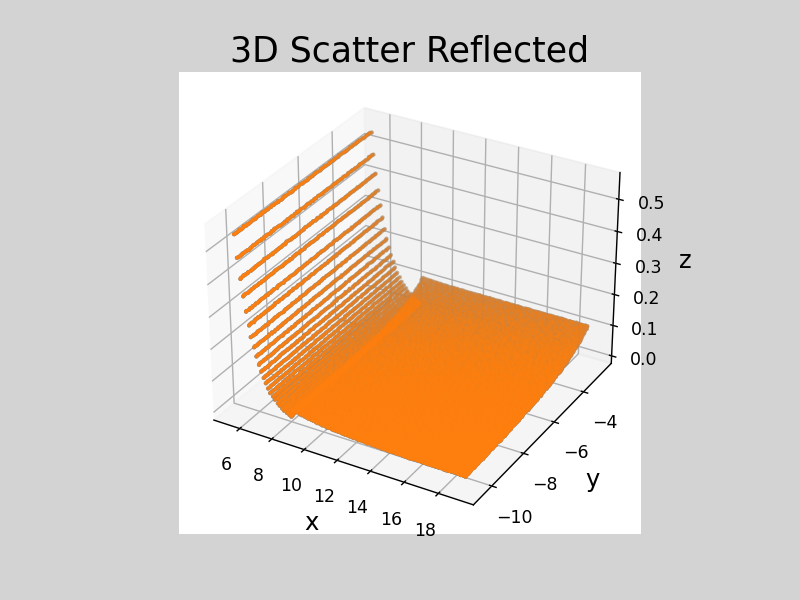

In [6]:
plt.figure("3D Scatter Reflected", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(DataX, DataY, DataF, s = 2)
plt.show()

## Engage Voronoi cell  

<IPython.core.display.Javascript object>


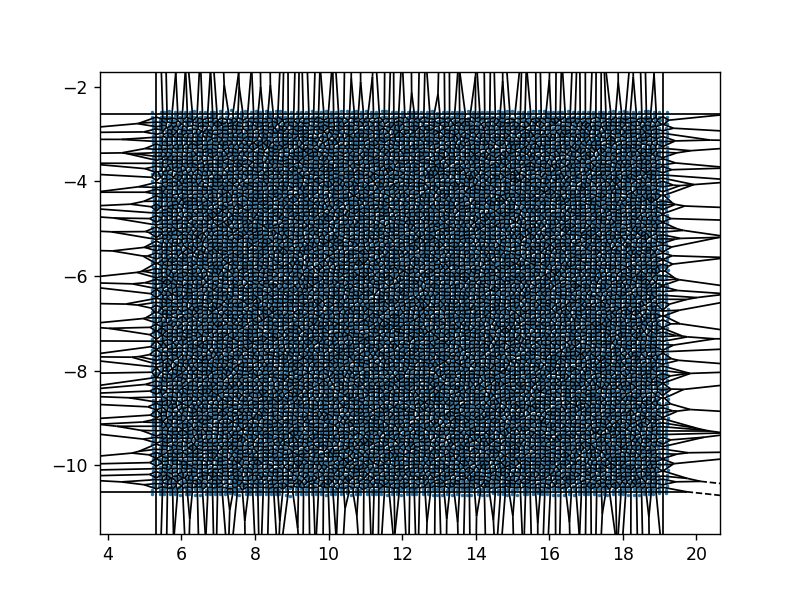

In [7]:
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull
Data2D = np.hstack((DataX_Xmax_Pt, DataY_Xmax_Pt))
type(Data2D)

vor = Voronoi(Data2D)
vor_vertices = copy.deepcopy(vor.vertices)

vor_regions = copy.deepcopy(vor.regions)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='black', point_size=2)
plt.show()

## Trimming Voronoi cell
The rige of our data field out of our boundary even tend to infinity, when 
apply the voronoi cell generation algorithm. Though, we got to trim off the 
exceeded points then make the field convex.

10405


<IPython.core.display.Javascript object>


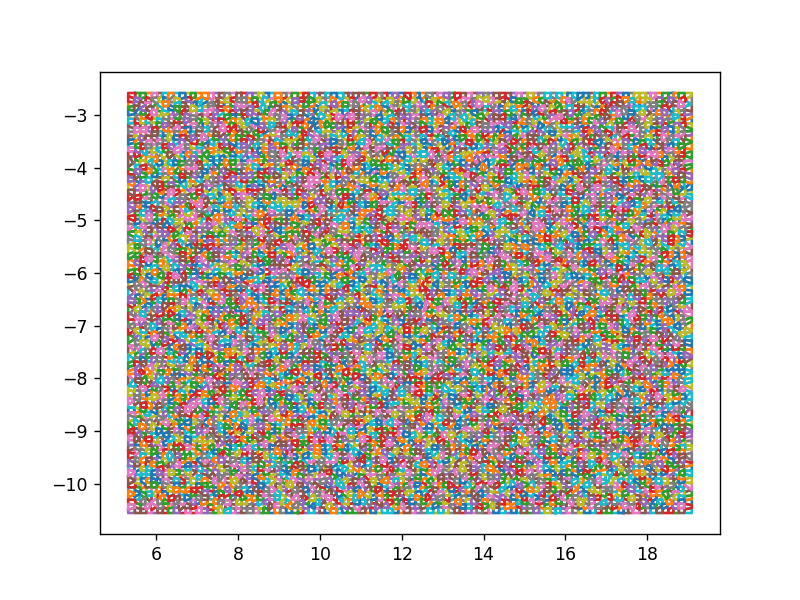

In [8]:
NoVoronoiCell = len(vor.regions)
print(NoVoronoiCell)
V_vertices_x = copy.deepcopy(vor.vertices[:, 0])
V_vertices_y = copy.deepcopy(vor.vertices[:, 1])

V_coord_x = [ [] for _ in range(NoVoronoiCell) ]
V_coord_y = [ [] for _ in range(NoVoronoiCell) ]

XMax = np.max(Pt_XMaxx_CR - 0.5 * Xmax_Offset)
YMax = np.max(Pt_YMaxy_CR - 0.5 * Ymax_Offset)
YMin = np.max(Pt_YMiny_CR - 0.5 * Ymin_Offset)
XMin = np.max(Pt_XMinx_CR - 0.5 * Xmin_Offset)

VEmptyCount = 0
for i in range(NoVoronoiCell):
    VL_Temp = len(vor.regions[i])
    if VL_Temp == 0:
        continue

    V_coord_x[i] = np.zeros(VL_Temp)
    V_coord_y[i] = np.zeros(VL_Temp)
    for j in range(VL_Temp):
        NoC = vor.regions[i][j]
        V_coord_x[i][j] = V_vertices_x[NoC]
        V_coord_y[i][j] = V_vertices_y[NoC]
        
        V_coord_x[i] = np.append(V_coord_x[i], V_coord_x[i][0])
        V_coord_y[i] = np.append(V_coord_y[i], V_coord_y[i][0])
        
        if V_coord_x[i][j] < XMin:
            V_coord_x[i] = []
            V_coord_y[i] = []
            VEmptyCount = VEmptyCount + 1
            break
        if V_coord_x[i][j] > XMax:
            V_coord_x[i] = []
            V_coord_y[i] = []
            VEmptyCount = VEmptyCount + 1
            break
        if V_coord_y[i][j] > YMax:
            V_coord_x[i] = []
            V_coord_y[i] = []
            VEmptyCount = VEmptyCount + 1
            break
        if V_coord_y[i][j] < YMin:
            V_coord_x[i] = []
            V_coord_y[i] = []
            VEmptyCount = VEmptyCount + 1
            break
            
NewIndex = 0
NewV_coord_x = list()
NewV_coord_y = list()
for NoC in range(len(vor.regions)):
    if len(V_coord_x[NoC]) == 0:
        continue
    elif len(V_coord_x[NoC]) != 0 and NewIndex == 0:
        NewV_coord_x.append(V_coord_x[NoC])
        NewV_coord_y.append(V_coord_y[NoC])
        NewIndex = NewIndex + 1
    else:
        NewV_coord_x.append(V_coord_x[NoC])
        NewV_coord_y.append(V_coord_y[NoC])
        NewIndex = NewIndex + 1

plt.figure()
for i in range(NewIndex): 
    plt.plot(NewV_coord_x[i], NewV_coord_y[i])
plt.show()  

In [9]:
plt.figure("3D Scatter Reflected", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(DataX, DataY, DataF, s = 2)
plt.show()

## Setting interpretation points

5.409033705173464 -2.6349438478320195
5.409033705173464 -10.50410041395589
18.982436038464247 -2.6349438478320195
18.982436038464247 -10.50410041395589


<IPython.core.display.Javascript object>


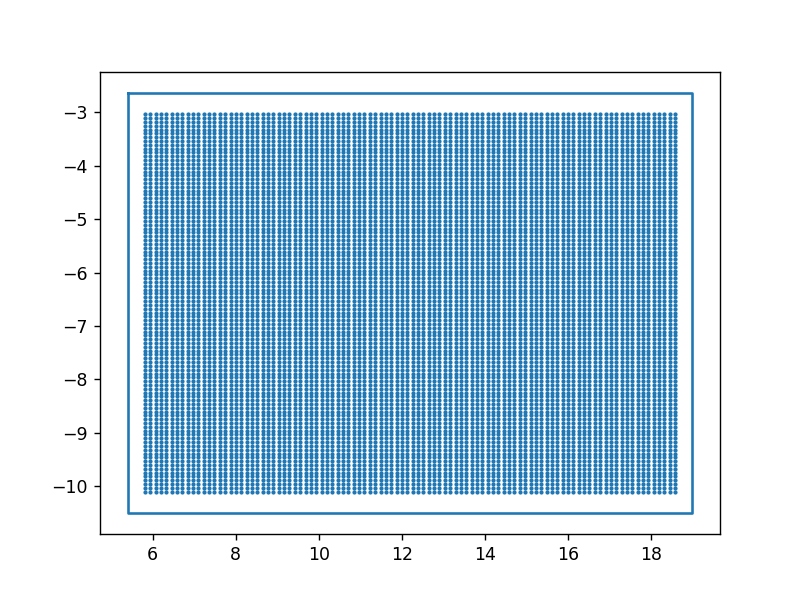

In [10]:
Interprete_LeftUp_x = np.mean(Pt_XMinx_Frame)
Interprete_LeftUp_y = np.mean(Pt_YMaxy_Frame)
Interprete_LeftDown_x = np.mean(Pt_XMinx_Frame)
Interprete_LeftDown_y = np.mean(Pt_YMiny_Frame)
Interprete_RightUp_x = np.mean(Pt_XMaxx_Frame)
Interprete_RightUp_y = np.mean(Pt_YMaxy_Frame)
Interprete_RightDown_x = np.mean(Pt_XMaxx_Frame)
Interprete_RightDown_y = np.mean(Pt_YMiny_Frame)

print(Interprete_LeftUp_x, Interprete_LeftUp_y)
print(Interprete_LeftDown_x, Interprete_LeftDown_y)
print(Interprete_RightUp_x, Interprete_RightUp_y)
print(Interprete_RightDown_x, Interprete_RightDown_y)

n = 100
xData = np.linspace(Interprete_LeftUp_x + 0.4, Interprete_RightUp_x - 0.4, num = n)
yData = np.linspace(Interprete_LeftUp_y - 0.4, Interprete_LeftDown_y + 0.4, num = n)
xPlot = np.zeros((n*n))
yPlot = np.zeros((n*n))

for xIndex in range(n):
    for yIndex in range(n):
        xPlot[xIndex  * n + yIndex] = xData[xIndex]
        yPlot[xIndex  * n + yIndex] = yData[yIndex]

xFrame = [Interprete_LeftUp_x, Interprete_LeftDown_x, Interprete_RightDown_x, Interprete_RightUp_x, Interprete_LeftUp_x]
yFrame = [Interprete_LeftUp_y, Interprete_LeftDown_y, Interprete_RightDown_y, Interprete_RightUp_y, Interprete_LeftUp_y]

plt.figure()       
plt.scatter(xPlot, yPlot, s = 2)
plt.plot(xFrame, yFrame)
plt.plot()
plt.show()

## ConvexHull volume

In [11]:
VolVoe = np.zeros(NewIndex)

for i in range(NewIndex):
    CellL = len(NewV_coord_y[0])
    xxx = np.zeros((CellL, 2))
    for j in range(CellL):
        
        xxx[j][0] = NewV_coord_x[0][j]
        xxx[j][1] = NewV_coord_y[0][j]

    vvvv = ConvexHull(xxx)
    VolVoe[i] = vvvv.volume
print(np.sum(VolVoe))
print(len(VolVoe))

163.77146490301666
10000


## SmoothInterpolation parameter

In [ ]:
from numba import jit
import math

Trimed_x = copy.deepcopy(DataX.transpose())
Trimed_x = np.array(Trimed_x)[0, :]
Trimed_y = copy.deepcopy(DataY.transpose())
Trimed_y = np.array(Trimed_y)[0, :]
Data_Trimed_F = copy.deepcopy(DataF.transpose())
Data_Trimed_F = np.array(Data_Trimed_F)[0, :]

print(Trimed_x)

h_0 = 0.4
h_1 = 4
hn = 100
h_num = np.zeros(100)

@jit(nopython=True)
def DistanceAll(xPlot, yPlot, Data_Trimed_xT, Data_Trimed_yT, h_0, h_1, hn, h_num, VolVoe):
    N_Data = len(Data_Trimed_xT)
    N_Quiry = len(xPlot)
    rij = np.zeros((N_Quiry, N_Data))
    dFdx = np.zeros((N_Quiry, N_Data))
    dFdy = np.zeros((N_Quiry, N_Data))

    for i in range(N_Quiry):
        for j in range(N_Data):
            
            xij = xPlot[i] - Data_Trimed_xT[j]
            yij = yPlot[i] - Data_Trimed_yT[j]
            rij[i,j] = np.sqrt(xij * xij + yij * yij);
            
            dFdx[i, j] = xij / rij[i,j]
            dFdy[i, j] = yij / rij[i,j]
            
            if dFdx[i, j] is None:
                dFdx[i, j] = 0
            if dFdy[i, j] is None:
                dFdy[i, j] = 0
            
    W_Gauij = np.zeros((N_Quiry, hn))
    for k in range(hn):
        
        h_num[k] = (((h_1 - h_0) / hn)) * k + h_0
        aGau = 1 / (math.pi * h_num[k] * h_num[k])
        
        for i in range(N_Quiry):
            W_Gauij[i, k] = 0
            for j in range(N_Data):
                
                q = rij[i, j] / h_num[k]
                W_GauN = aGau * math.exp( -1 * math.pow(q, 2))
                W_Gauij[i, k] = W_Gauij[i, k] + W_GauN * VolVoe[j]

    return(rij, W_Gauij, h_num, dFdx, dFdy)
 
rij_Vari, W_Gau_Var, h_num, dFdx, dFdy = DistanceAll(xPlot, yPlot, Trimed_x, Trimed_y, h_0, h_1, hn, h_num, VolVoe)

[ 5.4232244   5.53764135  5.69471559 ... 18.69004415 18.84199911
 18.9721587 ]


In [ ]:
plotC = np.linspace(0, 99, num = 100, dtype = int)

plt.figure() 
for i in range (100):
    Wlog = np.log(W_Gau_Var[i, :])
    plt.plot(plotC, Wlog)
plt.show()

<IPython.core.display.Javascript object>


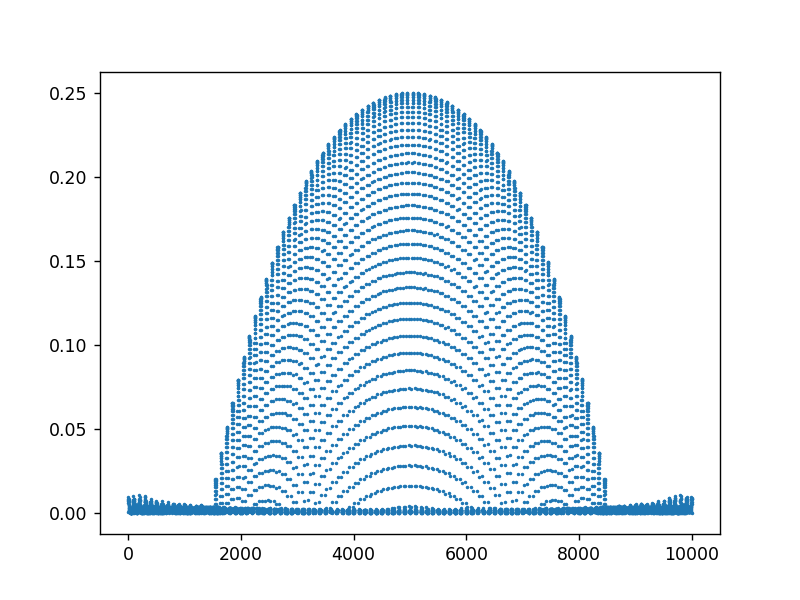

In [13]:
WR_MinMatrix = np.abs(copy.deepcopy(W_Gau_Var) - 1)
WR_Min = np.zeros(10000)
WR_h_CoordR = np.zeros(10000)
h_Fix = np.zeros(10000)

for i in range(10000):
    WR_Min[i] = WR_MinMatrix[i, :].min()
    WR_h_Coord = indexofMin(WR_MinMatrix[i, :])
    WR_h_Coord = int(WR_h_Coord)
#     print(WR_Min[i])
#     print(type(WR_h_Coord))
#     print(WR_h_Coord)
#     print(WR_MinMatrix[i, WR_h_Coord])
    WR_h_CoordR[i] = WR_h_Coord
#     print(WR_h_CoordR[i])
    h_Fix[i] = h_num[WR_h_Coord]
    
plotCOut = np.linspace(0, 9999, num = 10000, dtype = int)    
plt.figure()
plt.scatter(plotCOut, WR_Min, s = 1)
plt.show()

In [14]:
def get_median(data):
    data.sort()
    half = len(data) / 2
    return (data[half] + data[~half]) / 2

# midh = get_median(WR_Min)
print(int(WR_Min.min()))
print(h_Fix)
print(1/h_Fix[0])

0
[0.724 0.76  0.832 ... 0.832 0.76  0.724]
1.3812154696132595


In [15]:
N_Data = len(Trimed_x)
N_Quiry = len(xPlot)

@jit(nopython=True)
def GauFix(N_Quiry, N_Data, rij, h, VolVoe, DataF, dFdx, dFdy):

    W_GauijFix = np.zeros((N_Quiry, 1))
    Gauij_dev_x = np.zeros((N_Quiry, 1))
    Gauij_dev_y = np.zeros((N_Quiry, 1))
    aGau = np.zeros((N_Quiry, 1))
    q = np.zeros((N_Quiry, N_Data))
    
    for i in range(N_Quiry):
        
        aGau[i] = 1 / (math.pi * h[i] * h[i])
        
        for j in range(N_Data):
            
            q[i, j] = rij[i, j] / h[i]
            
            W_GauN = aGau[i] * math.exp(-1 * math.pow(q[i, j], 2))
            W_GauijFix[i] = W_GauijFix[i] + W_GauN * VolVoe[j] * DataF[j]
            
            Gau_dev_x = dFdx[i, j] * aGau[i] * math.exp(-1 * math.pow(q[i, j], 2)) * (-2 * rij[i, j] / math.pow(h[i], 2))
            Gauij_dev_x[i] = Gauij_dev_x[i] + Gau_dev_x * VolVoe[j] * DataF[j]

            Gau_dev_y = dFdy[i, j] * aGau[i] * math.exp(-1 * math.pow(q[i, j], 2)) * (-2 * rij[i, j] / math.pow(h[i], 2))
            Gauij_dev_y[i] = Gauij_dev_y[i] + Gau_dev_y * VolVoe[j] * DataF[j]
            
    return(W_GauijFix, Gauij_dev_x, Gauij_dev_y)

W_GauijFix, Gauij_dev_x, Gauij_dev_y = GauFix(N_Quiry, N_Data, rij_Vari, h_Fix, VolVoe, Data_Trimed_F, dFdx, dFdy)

In [16]:
print(W_GauijFix)
print(Gauij_dev_x)
print(Gauij_dev_y)

W_GauijFixT = copy.deepcopy(W_GauijFix.transpose())
W_GauijFixT = np.array(W_GauijFixT)[0, :]

Gauij_dev_xT = copy.deepcopy(Gauij_dev_x.transpose())
Gauij_dev_xT = np.array(Gauij_dev_xT)[0, :]

Gauij_dev_yT = copy.deepcopy(Gauij_dev_y.transpose())
Gauij_dev_yT = np.array(Gauij_dev_yT)[0, :]

print(W_GauijFixT)
print(Gauij_dev_xT)
print(Gauij_dev_yT)

[[0.32934651]
 [0.33053827]
 [0.31769151]
 ...
 [0.01523482]
 [0.01528411]
 [0.01491627]]
[[ 0.03331798]
 [ 0.03950036]
 [ 0.04647031]
 ...
 [-0.00973217]
 [-0.0098006 ]
 [-0.00954115]]
[[-0.22144726]
 [-0.18897929]
 [-0.15767464]
 ...
 [ 0.00891354]
 [ 0.01003206]
 [ 0.01121565]]
[0.32934651 0.33053827 0.31769151 ... 0.01523482 0.01528411 0.01491627]
[ 0.03331798  0.03950036  0.04647031 ... -0.00973217 -0.0098006
 -0.00954115]
[-0.22144726 -0.18897929 -0.15767464 ...  0.00891354  0.01003206
  0.01121565]


<IPython.core.display.Javascript object>


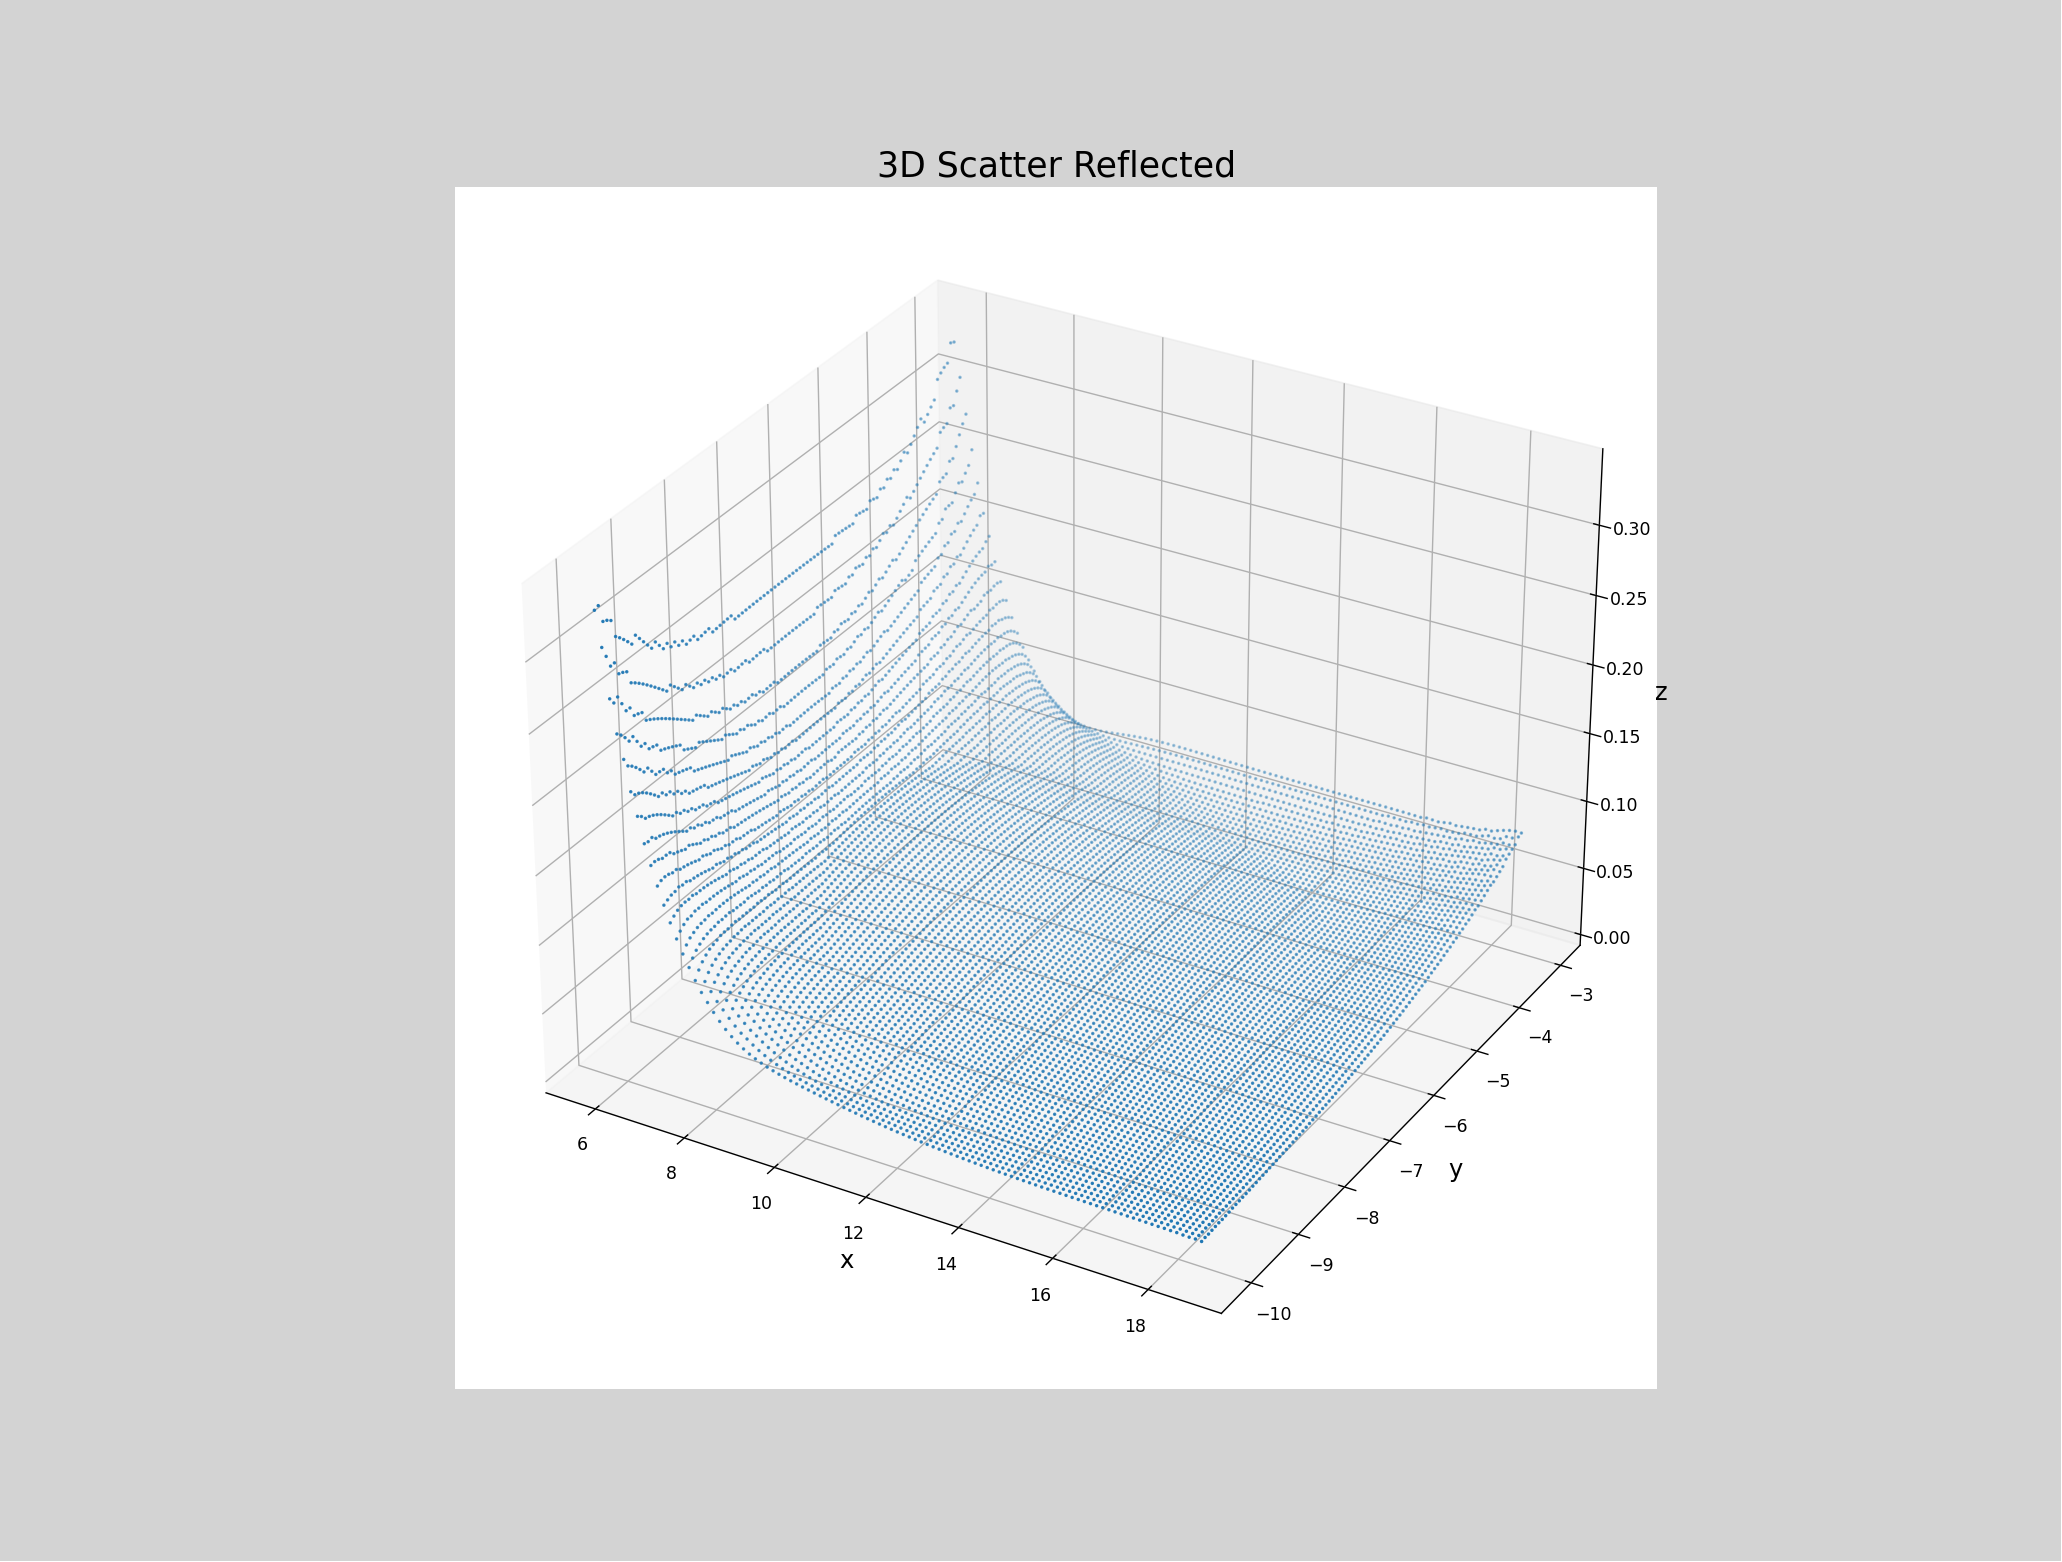

In [17]:
plt.figure("3D Scatter Smoothed", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(xPlot, yPlot, W_GauijFixT, s = 1)
plt.show()

In [18]:
lenDD = len(Gauij_dev_xT)
DD1 = copy.deepcopy(Gauij_dev_xT)
DD2 = copy.deepcopy(Gauij_dev_yT)

Count = 0
LastEigenvector = np.zeros((lenDD, 2))
for i in range(lenDD):
    Tswitch = 0
    pFpi = np.vstack((DD1[i], DD2[i]))
    WW = np.outer(pFpi, pFpi.transpose())
    Eigenvalues, Eigenvectors = np.linalg.eig(WW)
    vesSwitch = copy.deepcopy(Eigenvectors[:,1])
#     print(Eigenvectors)
    if Eigenvalues[0] > Eigenvalues[1]:
        Tswitch = 1
        Count = Count + 1
        Buffer = copy.deepcopy(vesSwitch[0])
        vesSwitch[0] = vesSwitch[1]
        vesSwitch[1] = Buffer
    LastEigenvector[i, 0] = abs(vesSwitch[0])
    LastEigenvector[i, 1] = abs(vesSwitch[1])
    
EigenFrame = pd.DataFrame({'Ev_x':LastEigenvector[:, 0], 'Ev_y':LastEigenvector[:, 1]})
EigenFrame.to_csv("Ev.csv", index = False, sep = ',')

In [19]:
from pylab import *
import operator
import random


df_full = pd.read_csv("Ev.csv")
columns = list(df_full.columns)
features = columns[:len(columns)]
df = df_full[features]

num_attr = len(df.columns)

k = 2

MAX_ITER = 100
n = len(df) 
m = 2.00
print(features)
print(df)
print(num_attr)
print(n)


['Ev_x', 'Ev_y']
          Ev_x      Ev_y
0     0.148781  0.988870
1     0.204598  0.978846
2     0.282701  0.959208
3     0.339928  0.940452
4     0.397732  0.917502
...        ...       ...
9995  0.799057  0.601256
9996  0.771178  0.636619
9997  0.737442  0.675411
9998  0.698807  0.715310
9999  0.647958  0.761676

[10000 rows x 2 columns]
2
10000


In [20]:
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x / summation for x in random_num_list] 
        membership_mat.append(temp_list)
    return membership_mat


def calculateClusterCenter(membership_mat):
    cluster_mem_val = zip(*membership_mat)
    cluster_centers = list()
    cluster_mem_val_list = list(cluster_mem_val)
    for j in range(k):
        x = cluster_mem_val_list[j]
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z / denominator for z in numerator]  
        cluster_centers.append(center)
    return cluster_centers


def updateMembershipValue(membership_mat, cluster_centers):
    data = []
    for i in range(n):
        x = list(df.iloc[i])
        data.append(x)
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j] / distances[c]), 2) for c in range(k)])
            membership_mat[i][j] = float(1 / den)
    return membership_mat, data



def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels


def fuzzyCMeansClustering():
    
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:  
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat, data = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    print(membership_mat)
    return cluster_labels, cluster_centers, data, membership_mat


def xie_beni(membership_mat, center, data):
    sum_cluster_distance = 0
    min_cluster_center_distance = inf
    for i in range(k):
        for j in range(n):
            sum_cluster_distance = sum_cluster_distance + membership_mat[j][i] ** 2 * sum(
                power(data[j, :] - center[i, :], 2))  
    for i in range(k - 1):
        for j in range(i + 1, k):
            cluster_center_distance = sum(power(center[i, :] - center[j, :], 2))  # 计算类间距离
            if cluster_center_distance < min_cluster_center_distance:
                min_cluster_center_distance = cluster_center_distance
    return sum_cluster_distance / (n * min_cluster_center_distance)


labels, centers, data, membership = fuzzyCMeansClustering()
print(labels)
print(centers)
center_array = array(centers)
label = array(labels)
datas = array(data)


[[0.12738228504605856, 0.8726177149539414], [0.10465987605384226, 0.8953401239461578], [0.07110363796141055, 0.9288963620385895], [0.04625882629576764, 0.9537411737042324], [0.023063659760310672, 0.9769363402396892], [0.006077147753923155, 0.9939228522460769], [0.0020890861284173787, 0.9979109138715826], [0.017096835465287827, 0.982903164534712], [0.05925341600299024, 0.9407465839970097], [0.13434794396783944, 0.8656520560321606], [0.2936413226079351, 0.7063586773920649], [0.4392602125958534, 0.5607397874041465], [0.5825706293598935, 0.4174293706401067], [0.7068084159284888, 0.2931915840715112], [0.8044212452212073, 0.19557875477879277], [0.9183704840869598, 0.08162951591304031], [0.9553028392944456, 0.044697160705554434], [0.9777170210344412, 0.02228297896555882], [0.9968968355017531, 0.0031031644982468425], [0.9983814916677253, 0.0016185083322747494], [0.9925642958869805, 0.0074357041130195724], [0.9879396561846439, 0.01206034381535611], [0.9745089792816715, 0.02549102071832858], [0.

In [21]:
print(datas)

[[0.14878107 0.98887016]
 [0.20459795 0.9788461 ]
 [0.28270056 0.95920821]
 ...
 [0.73744158 0.67541092]
 [0.69880685 0.71531041]
 [0.64795771 0.76167631]]


<IPython.core.display.Javascript object>


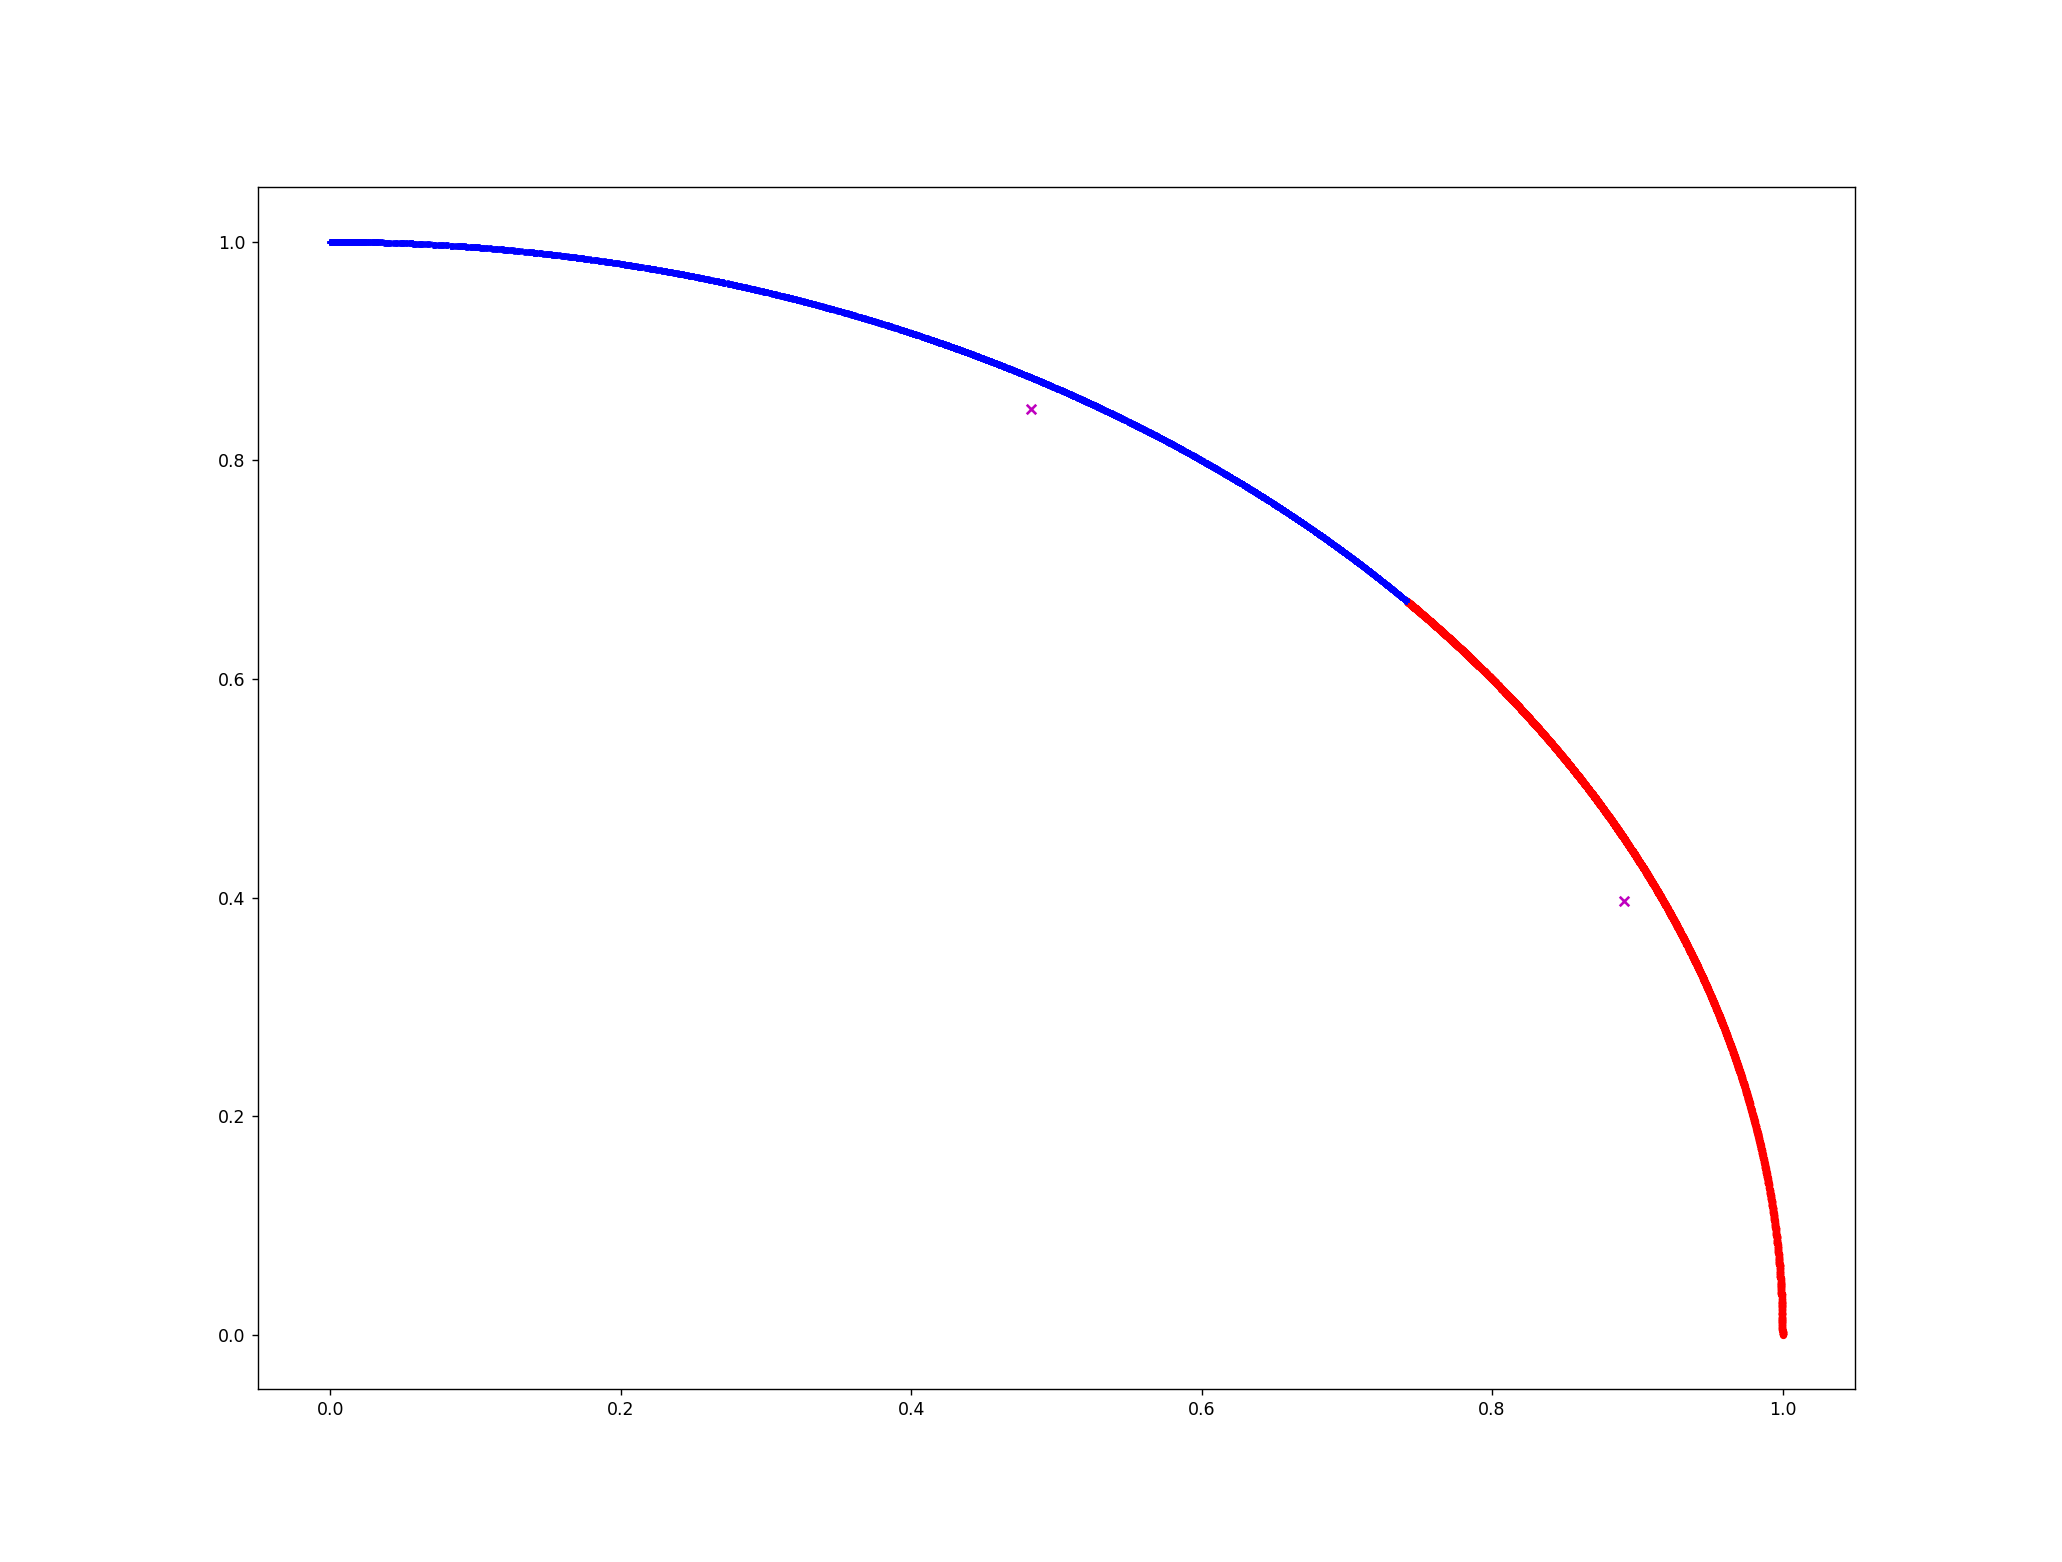

In [22]:

fig = plt.gcf()
fig.set_size_inches(16.5, 12.5)
f1 = plt.figure()
plt.scatter(datas[nonzero(label == 0), 0], datas[nonzero(label == 0), 1], marker='o', color='r', label='0', s=10)
plt.scatter(datas[nonzero(label == 1), 0], datas[nonzero(label == 1), 1], marker='+', color='b', label='1', s=10)
# plt.scatter(datas[nonzero(label == 2), 1], datas[nonzero(label == 2), 2], marker='*', color='g', label='2', s=10)
plt.scatter(center_array[:, 0], center_array[:, 1], marker='x', color='m', s=30)
plt.show()

In [23]:
print(xPlot)

[ 5.80903371  5.80903371  5.80903371 ... 18.58243604 18.58243604
 18.58243604]


<IPython.core.display.Javascript object>


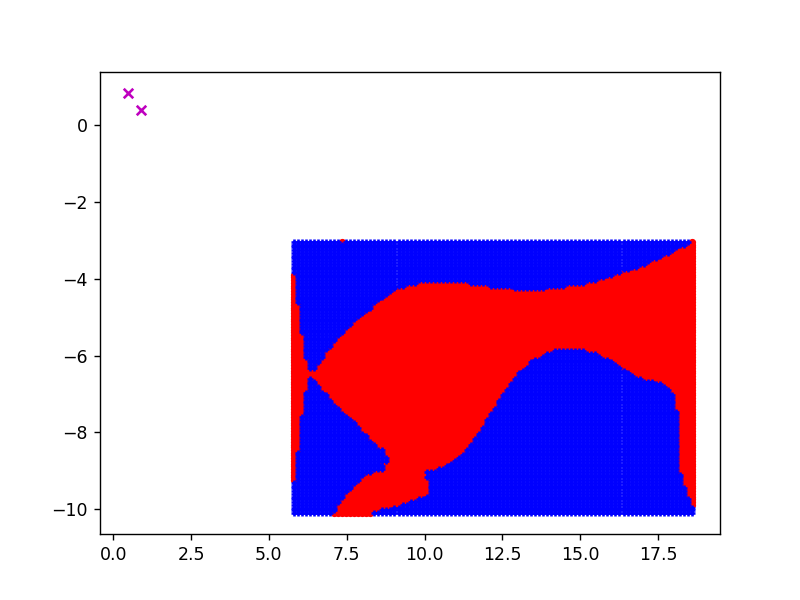

In [26]:
f1 = plt.figure()
plt.scatter(xPlot[nonzero(label == 0)], yPlot[nonzero(label == 0)], marker='o', color='r', label='0', s=10)
plt.scatter(xPlot[nonzero(label == 1)], yPlot[nonzero(label == 1)], marker='+', color='b', label='1', s=10)
# plt.scatter(datas[nonzero(label == 2), 1], datas[nonzero(label == 2), 2], marker='*', color='g', label='2', s=10)
plt.scatter(center_array[:, 0], center_array[:, 1], marker='x', color='m', s=30)
plt.show()

In [37]:
import numpy as np
import pysindy as ps

x1FIT = xPlot[nonzero(label == 0)]
y1FIT = yPlot[nonzero(label == 0)]
XY1FIT = np.stack((x1FIT, y1FIT), axis=-1)
t1 = len(x1FIT)
t11 = np.linspace(0, 1, t1)

x1SINDy = ps.SINDy(feature_names = ['a', 'b'])
x1SINDy.fit(XY1FIT, t = t11)
x1SINDy.print()

(a)' = 312.109 1 + -6.194 a + 80.721 b + -0.900 a b + 5.162 b^2
(b)' = 12012.867 1 + -227.037 a + 3322.148 b + -2.829 a^2 + -44.807 a b + 208.848 b^2


In [36]:
x2FIT = xPlot[nonzero(label == 1)]
y2FIT = yPlot[nonzero(label == 1)]
XY2FIT = np.stack((x2FIT, y2FIT), axis=-1)
t2 = len(x2FIT)
t22 = np.linspace(0, 1, t2)

x2SINDy = ps.SINDy(feature_names = ['a', 'b'])
x2SINDy.fit(XY2FIT, t = t22)
x2SINDy.print()

(a)' = 200.122 1 + -1.451 a + 66.020 b + 0.199 a^2 + 0.410 a b + 5.420 b^2
(b)' = 11584.824 1 + -163.720 a + 3930.698 b + 9.588 a^2 + 6.038 a b + 309.419 b^2
